# SVM with future prediction 19th March

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Training phase

### Reading and spliting the data

In [2]:
dataset = pd.read_csv(r"C:\Users\rezaa\11.Machine Learning\2.Classification\19th-svm\Social_Network_Ads.csv")

X = dataset.iloc[:,2:4].values
y = dataset.iloc[:,-1].values

### Spliting and scaling

In [3]:
# Spliting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
 
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training the model

In [4]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

## Testing phase

### Plot to show fit of the model

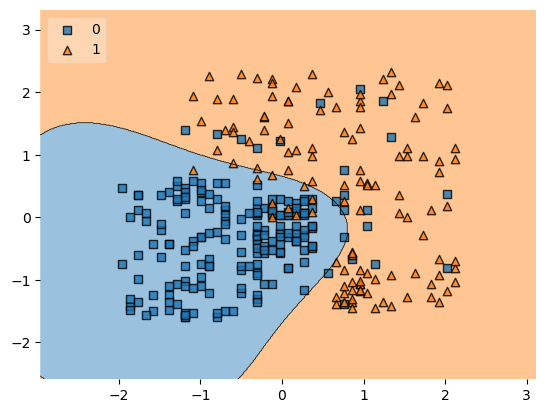

In [5]:
from mlxtend.plotting import plot_decision_regions
fig = plt.figure()
ax = plot_decision_regions(X_train, y_train, clf=model,legend=2)

### Various metrics

In [6]:
from sklearn.metrics import classification_report, accuracy_score, recall_score,confusion_matrix
print(classification_report(y_test, y_pred))
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print(f'Recall = {recall_score(y_test, y_pred)}')
print(f'Confusion matrix =\n {confusion_matrix(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80

accuracy = 0.95
Recall = 0.9545454545454546
Confusion matrix =
 [[55  3]
 [ 1 21]]


### Test data prediction

<Axes: >

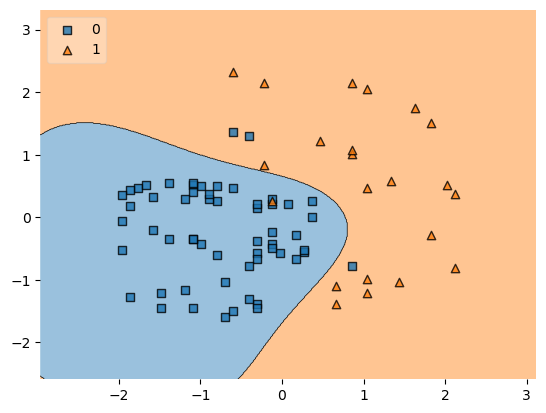

In [9]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X_test, y=y_test,clf=model, legend=2)

### Future prediction

In [17]:
dataset_ft = pd.read_csv(r"C:\Users\rezaa\11.Machine Learning\2.Classification\19th-svm\Future prediction1.csv")
X_ft = dataset_ft.iloc[:,2:4].values
X_ft = sc.transform(X_ft)
y_ft = model.predict(X_ft)

In [18]:
dataset_ft['Predicted values'] = y_ft
dataset_ft

,User ID,Gender,Age,EstimatedSalary,Predicted values
0,15724611,Male,45,60000,0
1,15725621,Female,79,64000,1
2,15725622,Male,23,78000,0
3,15720611,Female,34,45000,0
4,15588044,Male,29,76000,0
5,15746039,Female,70,89000,1
6,15704887,Male,86,120000,1
7,15746009,Female,46,23000,1
8,15876009,Male,32,70000,0
9,15886009,Female,100,90000,1
